지리정보데이터, GIS(Geospatial Information System) 라고 말하는 것은 위치에 대한 정보를 광범위하게 포함하는 말이다. 예로는 좌표, 주소, 도시 , 우편번호 등이 있다. 이 절에서는 지리정보를 처리하는데 유용한 패키지와 지리 정보 데이터를 처리하는 방법에 대해 설명할 것이다.

## GeoPandas

GeoPandas는 파이썬에서 지리정보 데이터 처리의 기하하적 연산과 시각화 등을 돕는 패키지이다. 이름으로도 알 수 있듯이, GeoPandas는 Pandas와 비슷하다. 두 가지의 자료형 GeoSeries와 GeoDataFrame이 있다. 다루는 방법에 큰 차이가 없다. 다만 지리정보 데이터 분석에 유용한 속성과 메서드가 존재한다. 다음과 같이 gpd라는 이름으로 임포트 하는 것이 관례이다.

In [1]:
import geopandas as gpd
gpd.__version__

'0.5.1'

GeoPandas는 간단한 지리정보데이터를 실습할 수 있는 샘플 데이터셋을 제공한다. 이 데이터를 사용해 GeoPandas의 기초적인 기능을 학습하겠다. 이 실습 데이터는 gpd.dataset.get_path( ) 명령으로 데이터의 링크를 불러와 사용 한다.

In [2]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [3]:
countries.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59024654668023 41.85540891928363,..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000000000001 10.76, -61.105 10..."
176,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385242171543 3.509171604222463,..."


In [4]:
cities.tail()

,name,geometry
197,Cairo,POINT (31.24802236112612 30.05190620510371)
198,Tokyo,POINT (139.7494615705447 35.68696276437117)
199,Paris,POINT (2.33138946713035 48.86863878981461)
200,Santiago,POINT (-70.66898671317483 -33.4480679569341)
201,Singapore,POINT (103.853874819099 1.294979325105942)


## 지리 정보의 시각화

GeoSeries와 GeoDataFrame 객체의 plot()명령을 사용하면, GeoPandas 내부의 Geometry 데이터를 손쉽게 시각화 할 수 있다. 

#### 이 때, Geometry 데이터는 지리정보를 표현하는 다각형, 선, 점을 의미하는데, GeoPandas는 내부적으로 다각형, 선, 점을 Shapely 패키지를 사용하여 처리한다. 
각 Polygon, LineString, Point 로 정의되어 있다. GeoPandas가 제공하는 데이터에는 Geometry 데이터가 이미 포함되어 있지만, 우리가 가진 데이터를 활용해 생성할 수도 있다. 이 부분은 다음 부분에서 학습 하겠다.

#### 대부분의 경우 지리정보를 시각화할 때는 위치에 따른 정보의 변화를 함께 표현한다. 

이 때는 plot() 명령의 column 인자에 반영하고 싶은 데이터의 열 이름을 입력하면 해당 열의 데이터를 색(color)으로 표현한다. 표현하려는 정보가 카테고리 데이터 일때는 categorical인자를 True로 설정한다.

In [5]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 15

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore')

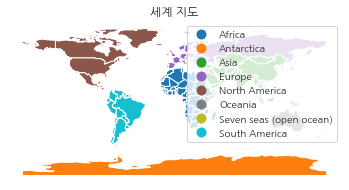

In [6]:
ax = countries.plot(column='continent', legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()

plt.savefig('./test.png', dpi=80)
plt.show()

만약, 표현하고 싶은 컬럼이 실수 변수라면, 색을 변화시키는 기준 즉 데이터를 구분하는 방법과 갯수를 정의할 수 있다. 

먼저 구분하는 방법은 plot()명령의 scheme 인자로 설정하는데, 지원하는 것으로는 "Equal_interval"(동일한 간격으로 구분), "Quantiles"(4분위수를 구하여 구분), "Fisher_Jenks"(클래스 내 분산을 줄이고, 클래스 끼리의 분산을 최대화하는 방식으로 구분)가 있다. 

구분하는 갯수는 k 인자에 원하는 숫자를 입력하면 된다. 디폴트는 5이다.

다음 코드는 국가별 GDP 추정치를 해당 국가의 추정인구로 나누어, 추정 1인당 GDP를 만들고, 이를 지도에서 색으로 표현한 예이다.

추가적으로, 정보를 색으로 나타낼 때는 표현하려는 정보에 따라, 컬러맵을 설정하는 것이 좋다. 이 예와 같이 수치적인 정보를 시각화 할 때는, 수치만큼 색이 밝고 어두워지는 것으로 표현하는 것이 더 적절하기 때문에 Sequence 계열의 컬러맵을 설정하는 것이 좋다. 컬러맵에 대해서는 이 곳을 참고하길 바란다.(https://matplotlib.org/users/colormaps.html)

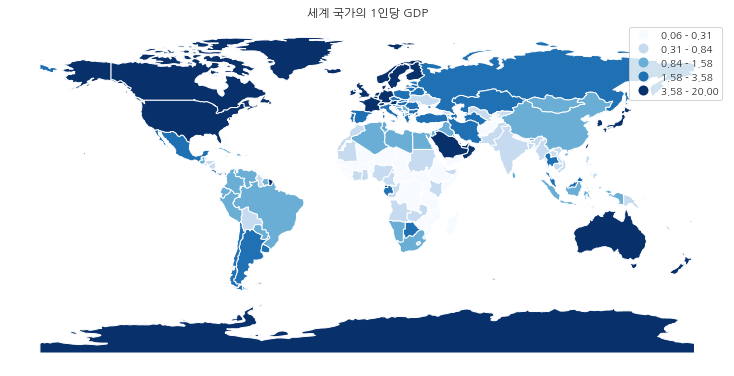

In [18]:
# 1인당 GDP 계산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap='Blues')
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
set_size(10, 10)

plt.show()

## Geometry 데이터

이미 언급 했듯이, GeoPandas에서는 Shapely라는 패키지를 통해 Geometry 데이터를 처리한다. 여기서는 Geometry 데이터에 대해서 공부해보도록 하자.

### Polygons

한 국가의 영토 따위 등은 여러 개의 점을 이은 다각형으로 나타낼 수 있다. "Countries" 데이터에서는 다음과 같이 Polygon 데이터를 제공한다.

In [8]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

In [9]:
# 여러 개의 점(Point)들로 이루어져있다.
print(countries.geometry[113])

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575 53.47012156840655, 23.80493493011778 53.08973135030607, 23.79919884613338 52.69109935160657, 23.19949384938619 52.48697744405367, 23.50800215016869 52.02364655212473, 23.52707075368437 51.57845408793031, 24.0299857927489 50.70540660257518, 23.92275719574326 50.42488108987874, 23.42650841644439 50.30850576435745, 22.5184501482116 49.47677358661974, 22.77641889821263 49.02739533140962, 22.55813764821175 49.08573802346714, 21.60780805836421 49.47010732685409, 20.88795535653841 49.32877228453583, 20.41583947111985 49.43145335549977, 19.82502282072687 49.21712535256923, 19.32071251799047 49.57157400165919, 18.90957482267632 49.43584585224458, 18.85314415861362 49.49622976337764, 18.39291385262217 49.98862864847075, 17.64944502123899 50.04903839781996, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.71947594571444 50.21574656839354, 16.17625328946227 50.42260732685791, 16.23862674323857 50.69773265237

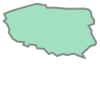

In [10]:
countries.geometry[113]

### Points

어떤 사건이 발생한 위치, 한 국가의 수도, 두 국가간의 중앙점 등은 하나의 좌표로 나타낼 수 있다. "Cities" 데이터에서는 도시를 하나의 점으로 나타내었다. 이 점을 다음처럼 지도위에 표현 할 수 있다.

In [11]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

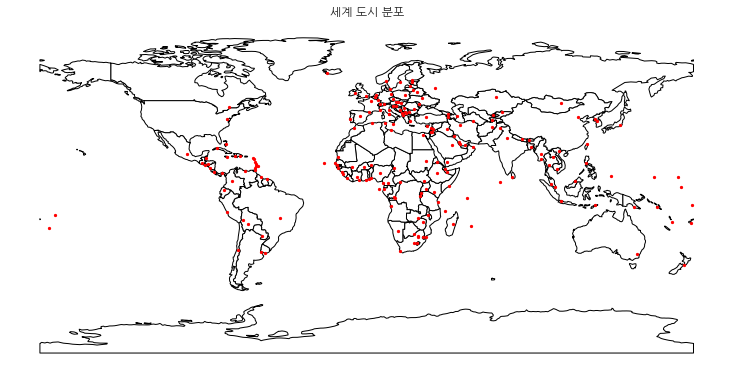

In [22]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

base = countries.plot(color='white', edgecolor='k')
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
set_size(10, 10)
ax.set_axis_off()
ax.set_title("세계 도시 분포")

plt.show()

### LineString

점과 점을 이은 것은 선이 된다. 두 도시 사이의 길, 강의 흐름, 국경의 생김새, 경계면 정보 등을 선으로 나타낼 수 있겠다. 다음 코드는 우리나라의 육지를 선으로 나타낸 것이다. 여기서 사용되는 squeeze()함수는 GeoPandas 객체에서 Geometry 데이터 만을 추출해주는 기능을 한다. boundary 속성에 대해서는 다음 단락에서 학습하겠다.

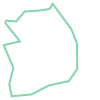

In [23]:
korea_border = countries[countries.name == "South Korea"].geometry
korea_border.boundary.squeeze()

### Geometry 데이터의 속성

Geometry 타입의 데이터는 다음과 같은 속성을 가지고 있다.

+ 지리정보의 속성 ( 아래의 속성값은 Point 데이터에서는 모두 0이다. )
    + area : 넓이
    + boundary : 테두리
    + centroid : 중앙지점
    
그리고 두 Geometry 간의 거리를 계산 해주는 함수 또한 유용하게 사용된다.

+ distance : 두 점사이의 거리

#### 넓이, 거리는 우리가 흔히 사용하는 제곱미터, 마일, 킬로미터 등의 단위를 사용하는 것이 아니다. 그래서 같은 객체 안에서의 비교만 가능하다.

## GeoPandas의 지리 데이터 간의 관계 연산

GeoPandas는 지리데이터 간의 관계를 연산해 주는 기능을 가지고 있다. 

#### 관계를 연산한다는 말은 두 데이터가 교차하는지, 하나가 다른 하나의 내부에 있는지 등을 말한다.

좌표 데이터를 Shapely의 Geometry 자료형으로 만들면, 불러온 데이터셋을 이용하여 어떤 도시가 어느 나라 안에 있는지, 도시끼리의 거리는 얼마나 되는지, 어떤 도시가 두 도시 사이에 존재하는지 등의 관계를 알 수 있다.

In [24]:
print(type(countries.geometry[0]))
print(type(korea_border.boundary.iloc[0]))
print(type(cities.geometry[0]))

<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.point.Point'>


In [25]:
from shapely.geometry import Point, Polygon, LineString

### 관계 연산 예제

지리적 관계에 대한 경우의 수는 매우 많기 때문에 간단한 예제를 통해 기본적인 관계연산을 학습해 보겠다.

먼저, 동북아시아의 주요 국가와 도시를 각 각 선과 점으로 나타내고, 도시들을 이어 주었다.

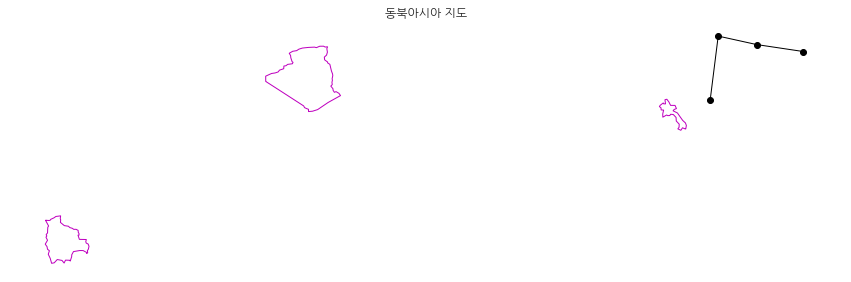

In [26]:
northern_asia = countries.loc[[30, 82, 92]]

korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()  # border
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()

seoul = Point(126.99778, 37.56829) # 경도, 위도
beijing = Point(116.363625, 39.913818)
tokyo = Point(139.839478, 35.652832)
hongkong = Point(114.149139, 22.286394)

line = LineString([hongkong, beijing, seoul, tokyo])  # 각 도시들을 연결하는 선 만들기

base = northern_asia.plot(figsize=(15, 15), color='w', edgecolor='m')
ax = gpd.GeoSeries([seoul, hongkong, beijing, tokyo, line]).plot(
    ax=base, color='k', edgecolor='k', lw=1)
ax.set_title("동북아시아 지도")
ax.set_axis_off()

plt.show()

다음은 기본적인 관계 연산 함수들이다. 관계연산의 출력값은 부울리언 값이다.

+ 기본 관계 연산
    + within : 지리적으로 포함되는지 여부
    + contains : 지리적으로 포함하고 있는지 여부
    + intersects : 지리적으로 교차하는지 여부, 두 지리가 경계선만 닿아있어도, True를 반환
    + crosses : 지리적으로 교차하는지 여부, intersects와 차이점은 crosses는 내부를 지나가야만 True를 반환한다는 것이다.

서울은 한국 안에 있다.

In [28]:
seoul.within(korea)

True

In [29]:
korea.contains(seoul)

True

In [30]:
china.intersects(korea)

False

홍콩, 베이징, 토쿄, 서울을 잇는 선은 한국을 지나간다.

In [31]:
line.crosses(korea)

True

In [32]:
line.crosses(china)

True

위와 같은 간단한 관계연산을 이용하면 데이터 검색 또한 가능하다.

In [34]:
countries.name[countries.crosses(line)]  # line이 지나가는 국가 검색

95     North Korea
96     South Korea
139          China
155          Japan
Name: name, dtype: object

### 속성을 이용한 연산

서울에서 베이징까지의 거리

In [35]:
seoul.distance(beijing)

10.889754550163614

한국과 다른 국가들간의 거리 중 서울과 베이징 간의 거리보다 가까운 국가를 찾는다.

In [36]:
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,142257519,Europe,Russia,RUS,3745000.0,"(POLYGON ((178.7253 71.0988, 180.0000000000001...",2.632550
95,25248140,Asia,North Korea,PRK,40000.0,(POLYGON ((130.7800036600468 42.22000781320322...,0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.1747587423762 37.74968577732804,...",3.768955
139,1379302771,Asia,China,CHN,21140000.0,(POLYGON ((109.4752095886636 18.19770091396857...,1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"(POLYGON ((141.884600864835 39.18086456965148,...",3.900313


한국의 면적 과 중국 면적의 비율 구하기

In [37]:
china.area / korea.area

95.89679828612043

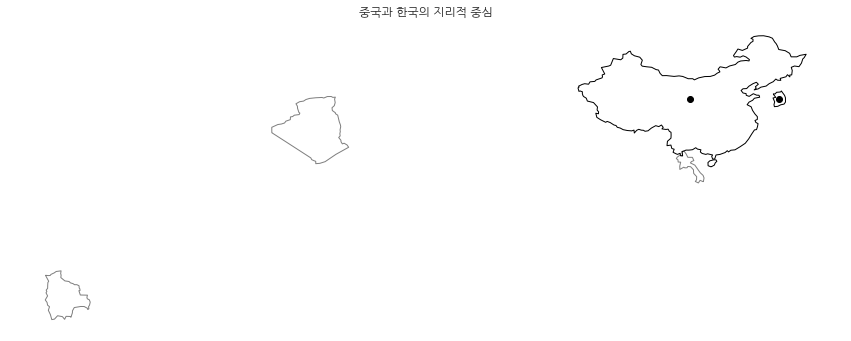

In [40]:
base = northern_asia[northern_asia.name != 'Japan'].plot(figsize=(15, 15), color='w', edgecolor='gray')
ax = gpd.GeoSeries([china.boundary, korea.boundary, china.centroid, korea.centroid]).plot(
    ax=base, color='k', edgecolor='k', lw=1)
ax.set_title("중국과 한국의 지리적 중심")
ax.set_axis_off()
plt.show()

### 지리 정보 조작

이번에는 한국의 기초구역도 데이터를 활용하여 지리정보를 조작하는 예제를 만들었다.

데이터는 아래의 링크에서 다운로드 할 수 있다.

+ http://www.juso.go.kr/addrlink/addressBuildDevNew.do?menu=bsin

다운로드 받은 파일의 압축을 풀면, 다음과 같은 파일 구조를 확인 할 수 있다.

각 지역마다 폴더가 나뉘어져 있다. 그 중 우리는 서울특별시 데이터를 사용한다. 서울특별시 폴더 안의 파일은 총 3개로, 각 파일의 확장자는 .dbf, .shx, .shp 이다. 이 중 .shp 확장자를 가진 파일을 불러 올 것이다.

+ shape file 이란 ?

#### .shp, .shx, .dbf 3개의 파일을 합쳐서 shape file 이라고 한다. shpae file은 GIS에서 사용하는 벡터 형식의 데이터 이다.

+ .shp : 점, 다각형 등의 지리정보를 담고 있다. 이 때 지리정보의 타입은 혼용되지 않는다. 점과 다각형이 같은 파일에 저장 될 수 없다는 뜻이다.
+ .shx : 지리정보의 인덱스 정보를 담고 있다.
+ .dbf : 지리정보의 속성 정보를 담고 있다.

.shp 파일은 나머지 .dbf, .shx 파일이 없으면 불러올 수 없다. 

그리고 "GRS80_UTMK.prj"는 데이터가 사용하는 좌표계 정보가 들어있다. 이 부분은 바로 다음 단락에서 학습할 것이다. 

결과적으로 총 4가지 파일이 모두 한 곳에 있도록 한다.

각 열의 의미는 다음과 같다.

+ BAS_MGT_SN : 기초구역 관리번호
+ CTP_KOR_NM : 시도명
+ SIG_CD : 시군구코드
+ SIG_KOR_NM : 시군구명
+ BAS_ID : 기초구역번호 본번
+ BAS_AR : 기초구역 면적(km²)
+ NTFC_DE : 고시일자
+ MVMN_DE : 이동일자
+ MVMN_RESN : 이동사유
+ OPERT_DE : 작업일시

In [41]:
seoul_file = "./korea_gps/서울특별시/TL_KODIS_BAS_11.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail(3)

,BAS_MGT_SN,CTP_KOR_NM,SIG_CD,SIG_KOR_NM,BAS_ID,BAS_AR,NTFC_DE,MVMN_DE,MVMN_RESN,OPERT_DE,geometry
5662,1129000046,서울특별시,11290,성북구,02851,0.052,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((957702.9099090951 1954159.860729071,..."
5663,1129000047,서울특별시,11290,성북구,02822,1.087,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((954675.9156118908 1956603.959798415,..."
5664,1129000068,서울특별시,11290,성북구,02838,0.126,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((955414.3235739921 1955463.202727248,..."


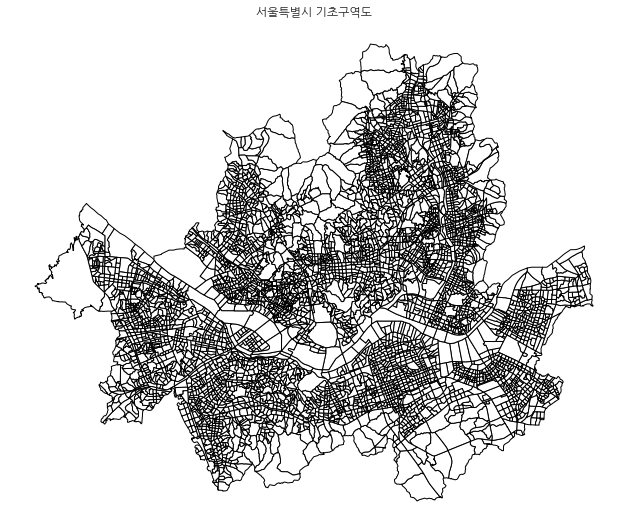

In [42]:
ax = seoul.plot(figsize=(11, 11), color='w', edgecolor='k')
ax.set_title("서울특별시 기초구역도")
ax.set_axis_off()
plt.show()

다음 나열된 함수들은 지리정보를 변환하는 기능을 가진다.

+ convex_hull
    + Polygon 데이터의 convex hull을 그린다.

+ envelope
    + Polygon 데이터를 감싸는 가장 작은 사각형을 그린다.

+ simplify(tolerance, preserve_topology=True)
    + Polygon 데이터에 대해 컨투어 추정을 한다.

+ buffer(distance, resolution=16)
    + Point, LineString 데이터에 실행하면 주어진 거리 내의 모든 점을 이어 Polygon 데이터를 만들고, Polygon에 적용하면 주어진 거리만큼 확장한다.

+ unary_union
    + 여러 개의 geometry 데이터의 합집합을 구한다.
    + Polygon 내에 빈 곳이 있는 경우, unary_union가 실행 되지 않는다. 이 때는 buffer() 명령으로 Polygon의 빈 곳을 채워준 후 사용한다.

다음 코드는 동작구의 기초 구역도를 convex_hull, envelope, unary_union을 이용해 변환하는 예이다.

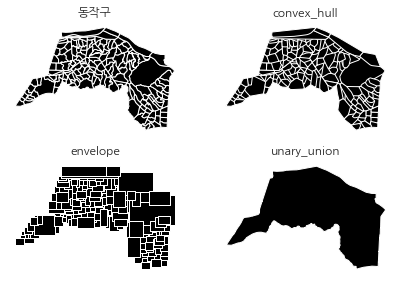

In [44]:
sample = seoul[seoul.SIG_KOR_NM == '동작구']

ax = plt.subplot(221)
sample.plot(color='k', edgecolor='w', ax=ax)
ax.set_title('동작구')
ax.set_axis_off()

ax = plt.subplot(222)
sample.convex_hull.plot(color='k', edgecolor='w', ax=ax)
ax.set_title('convex_hull')
ax.set_axis_off()

ax = plt.subplot(223)
sample.envelope.plot(color='k', edgecolor='w', ax=ax)
ax.set_title('envelope')
ax.set_axis_off()

ax = plt.subplot(224)
gpd.GeoSeries([sample.geometry.buffer(0.01).unary_union]).plot(ax=ax, color='k', edgecolor='w')
ax.set_title('unary_union')
ax.set_axis_off()

plt.tight_layout()
plt.show()

#### GeoDataFrame 또한 Pandas DataFrame의 groupby 명령과 같은 그룹핑 기능을 제공한다.

+ Dissolve
    + GeoDataFrame 내의 geometry를 그룹 별로 unary_union를 이용해 geometry 데이터를 합친다. 다른 컬럼에 정보가 있는 경우, aggfunc 인수를 설정하여 처리 방법을 정의 할 수 있다.


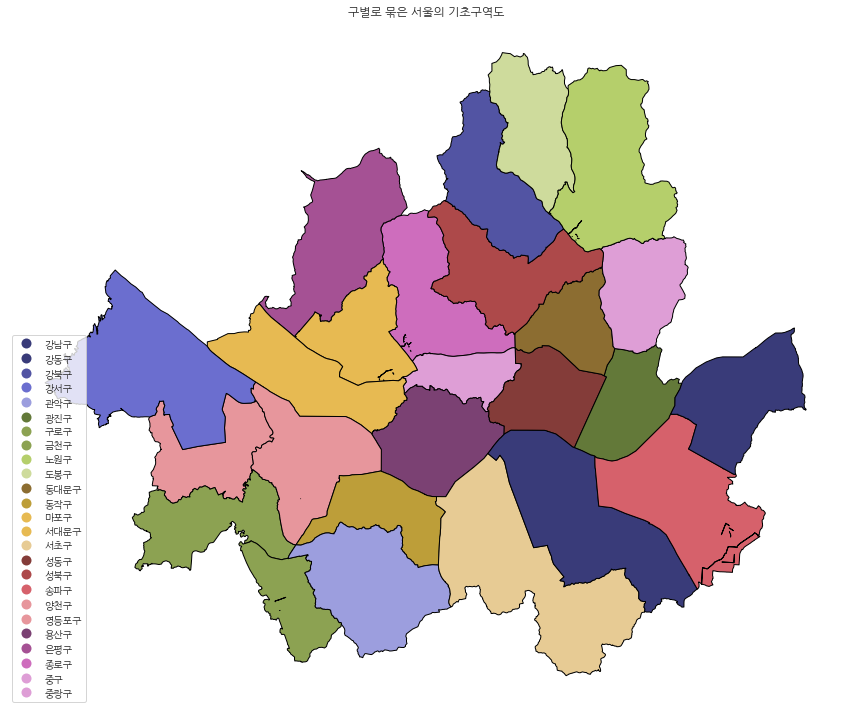

In [46]:
seoul.geometry = seoul.buffer(0.001)  # buffer() 명령으로 Polygon의 빈 곳을 채워줌
seoul = seoul.dissolve(by='SIG_CD') # SIG_CD : 시군구코드 그룹핑
ax = seoul.plot(figsize=(15, 15), column="SIG_KOR_NM", categorical=True, cmap="tab20b", edgecolor='k', legend=True, legend_kwds={'loc': 3})
ax.set_title("구별로 묶은 서울의 기초구역도")
ax.set_axis_off()
plt.show()

## GeoPandas의 유용한 기능

### 좌표계 (Coordinate reference systems)

좌표계(CRS) 는 지구라는 곡면을 2차원 데이터(평면)로 표현하는 방법론을 의미한다. GeoPandas 데이터라면 crs 속성값으로 확인 할 수 있다. 

좌표계가 다른 데이터의 경우, 좌표간의 거리나 위치 등이 다르게 표현되기 때문에 반드시 통일 시켜주어야 한다. 잘 사용되는 좌표계는 다음과 같다.

+ WGS84(EPSG:4326): GPS가 사용하는 좌표계(경도와 위도)
+ Bessel 1841(EPSG:4004) : 한국과 일본에 잘 맞는 지역타원체를 사용한 좌표계
+ Web mercator projection(Pseudo-Mercator, EPSG:3857) : 구글지도/빙지도/야후지도/OSM 등 에서 사용중인 좌표계
+ Albers projection(EPSG:9822) : 미국 지질 조사국에서 사용하는 좌표계

GeoPandas는 좌표계 변환 기능을 to_crs()라는 함수로 제공한다. 다음 코드는 "epsg:4326" 에서 "epsg:3857"로 변환한다. 

다음 코드의 시각화된 결과를 보면, 남극이 찢어져 있는 것을 볼 수 있다. 

"epsg:3857", Web mercator projection은 내부적으로 계산이 간단하고 빠르다는 장점이 있지만, 북위 85도, 남위 85도 이상의 지역, 즉 극지방에 대해서는 정보 왜곡이 심하다. 남극 부분이 왜곡된 것은 이 때문이다.

In [47]:
countries.crs  # 좌표계 정보 (GPS가 사용하는 좌표계(경도/위도))

{'init': 'epsg:4326'}

In [48]:
# 이전의 좌표계와의 비교
countries_mercator = countries.to_crs(epsg=3857)

print(countries_mercator.geometry[113])

POLYGON ((2614241.130436478 7153601.785967642, 2619073.309504623 7070435.576908914, 2649953.234787724 6999613.069934944, 2649314.696839431 6926062.815965137, 2582555.841975354 6888660.742470467, 2616898.828923959 6804402.184097363, 2619021.536157463 6724260.516108002, 2675005.782218406 6569348.070398897, 2663069.149401261 6520185.512981648, 2607826.987982928 6499876.023004116, 2506742.403952632 6356150.531597701, 2535459.353843323 6279511.087609828, 2511160.396243507 6289421.884152674, 2405370.190215897 6355008.512342297, 2325236.554002486 6330832.415777707, 2272680.854042278 6348389.632347572, 2206911.445368343 6311783.649685667, 2150771.879265925 6372407.960023718, 2105004.240377633 6349141.515028632, 2098722.407589047 6359484.52348315, 2047489.804278448 6444306.756093701, 1964727.232548202 6454772.762874234, 1954165.469727828 6509230.959613076, 1877822.793045259 6528767.982364262, 1861203.548607317 6483723.521564442, 1800732.279125955 6519788.224792923, 1807675.660239353 6567999.294

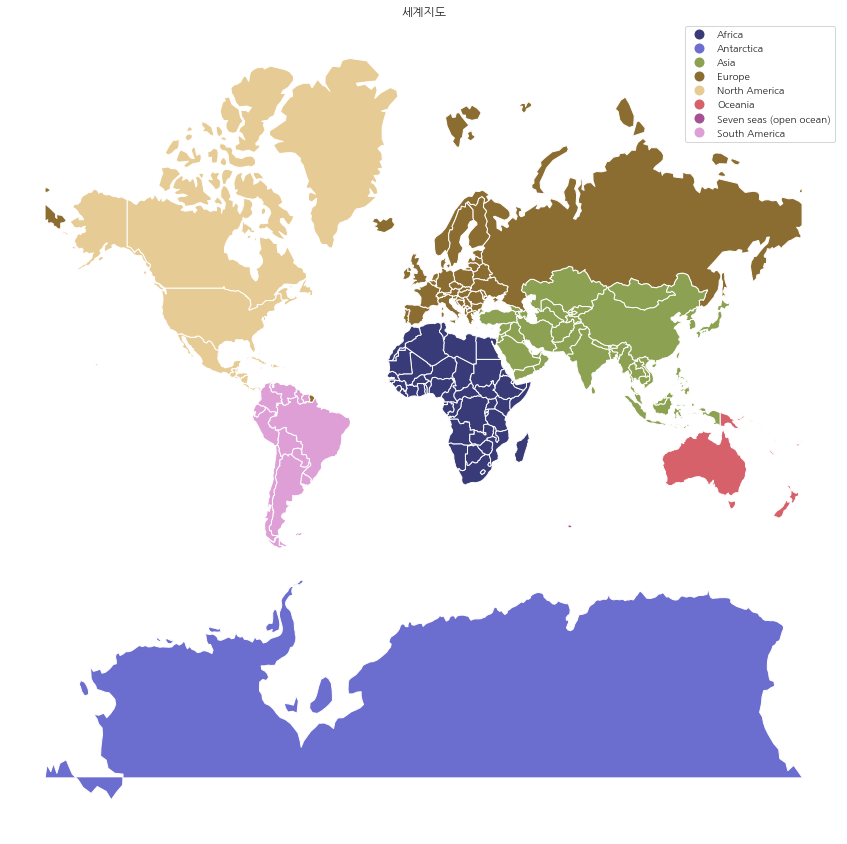

In [49]:
ax = countries_mercator.plot(figsize=(15, 15), column='continent', cmap='tab20b', legend=True, categorical=True)
ax.set_title("세계지도")
ax.set_axis_off()
plt.show()

## Geoplot

Geoplot은 지리 정보 데이터를 쉽게 시각화 할 수 있도록 해주는 패키지이다.

In [50]:
import geoplot as gplt

Geoplot의 여러가지 시각화를 실습하기 위해 사용할 데이터를 불러온다.

Quilt를 이용해 데이터를 불러오겠다.

In [52]:
import quilt
quilt.install("ResidentMario/geoplot_data")

  0%|          | 0.00/42.4M [00:00<?, ?B/s]

100%|██████████| 42.4M/42.4M [00:12<00:00, 3.36MB/s]


다음은 "geoplot_data"가 포함하고 있는 데이터 목록이다.

In [54]:
from quilt.data.ResidentMario import geoplot_data
geoplot_data

<GroupNode>
README
boston_airbnb_listings
boston_zip_codes
contiguous_usa
dc_roads
la_flights
napoleon_troop_movements
ny_census_partial
nyc_boroughs
nyc_collision_factors
nyc_fatal_collisions
nyc_injurious_collisions
nyc_parking_tickets_sample
nyc_police_precincts
obesity_by_state
usa_cities

불러올 데이터는 미국의 도시("usa_cities") 중 2010년 기준 인구 100,000명이 넘는 도시들에 대한 데이터와 하와이와 알래스카를 제외한 미국의 주 데이터, 그리고 뉴욕의 자치구 데이터와 뉴욕의 충돌사고 데이터이다.

In [55]:
continental_cities = gpd.read_file(geoplot_data.usa_cities()).query('POP_2010 > 100000')
continental_cities.tail(3)

,id,POP_2010,ELEV_IN_FT,STATE,geometry
3661,38128,2565635.0,49.0,NY,POINT (-73.94956366461773 40.65009286445409)
3662,38129,2272771.0,39.0,NY,POINT (-73.79744534868894 40.75016214067753)
3663,38130,470728.0,164.0,NY,POINT (-74.14981237852962 40.58328072025186)


In [56]:
contiguous_usa = gpd.read_file(geoplot_data.contiguous_usa())
contiguous_usa.tail(3)

,id,adm1_code,State,geometry
46,47,USA-3560,Pennsylvania,"POLYGON ((-74.89175400000001 40.081791, -75.12..."
47,48,USA-3561,Maine,"POLYGON ((-67.137344 45.137452, -66.9646599999..."
48,49,USA-3562,Michigan,"POLYGON ((-90.395278 46.611677, -90.3555900000..."


In [57]:
boroughs = gpd.read_file(geoplot_data.nyc_boroughs())
boroughs.tail(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
2,3,Brooklyn,726568.94634,1.959432e+09,(POLYGON ((-73.8670614947212 40.58208797679338...
3,1,Manhattan,358532.95642,6.364422e+08,(POLYGON ((-74.01092841268033 40.6844914725429...
4,2,Bronx,464517.89055,1.186804e+09,(POLYGON ((-73.89680883223775 40.7958084451597...


In [58]:
collisions = gpd.read_file(geoplot_data.nyc_collision_factors())
collisions.tail(3)

,id,ON STREET NAME,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 3,NUMBER OF CYCLIST INJURED,LONGITUDE,OFF STREET NAME,VEHICLE TYPE CODE 4,LATITUDE,LOCATION,...,ZIP CODE,VEHICLE TYPE CODE 3,NUMBER OF CYCLIST KILLED,DATE,UNIQUE KEY,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 5,TIME,NUMBER OF PEDESTRIANS INJURED,geometry
7300,920263,SHORE BOULEVARD,0,None,0,-73.953836,None,None,40.581744,"(40.5817444, -73.9538363)",...,11235.0,None,0,01/04/2016,3365285,None,None,17:45:00,0,POINT (-73.95383630000001 40.5817444)
7301,920286,WEST 38 STREET,0,None,0,-73.982723,None,None,40.750960,"(40.7509597, -73.9827227)",...,10016.0,None,0,01/02/2016,3364048,None,None,17:20:00,0,POINT (-73.98272270000002 40.7509597)
7302,920292,SCHENECTADY AVENUE,0,None,0,-73.934391,None,None,40.663604,"(40.6636039, -73.9343912)",...,11213.0,None,0,01/02/2016,3364205,None,None,20:00:00,0,POINT (-73.93439120000002 40.6636039)


Geoplot의 polyplot()과 pointplot()은 각각 다각형과 점을 시각화 한다.

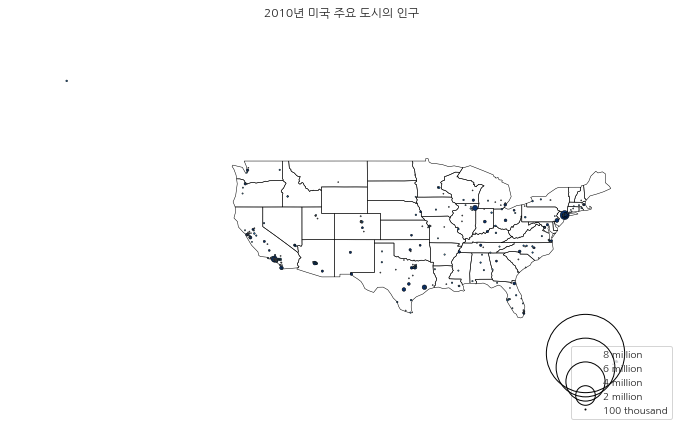

In [59]:
base = gplt.polyplot(contiguous_usa, linewidth=0.5, figsize=(12, 12))
gplt.pointplot(continental_cities, scale='POP_2010', limits=(1, 80), hue='POP_2010', cmap='Blues', k=5, linewidth=0.5,
              edgecolor='black', legend=True, legend_var='scale', 
              legend_values=[8000000, 6000000, 4000000, 2000000, 100000],
               legend_labels=['8 million', '6 million', '4 million',
                              '2 million', '100 thousand'],
              legend_kwargs={'loc': 'lower right'}, ax=base)
ax.set_ylim((-1597757, 1457718))
plt.title("2010년 미국 주요 도시의 인구")
plt.show()

위의 시각화된 결과는 미국 대륙을 완전한 평면 위에 투영한 것이다. Geoplot은 내부적으로 GeoPandas를 이용하여 다양한 좌표계를 제공한다. 다음 코드는 미국에서 많이 사용하는 Albers projection을 사용하여 미국 대륙을 시각화 한다.

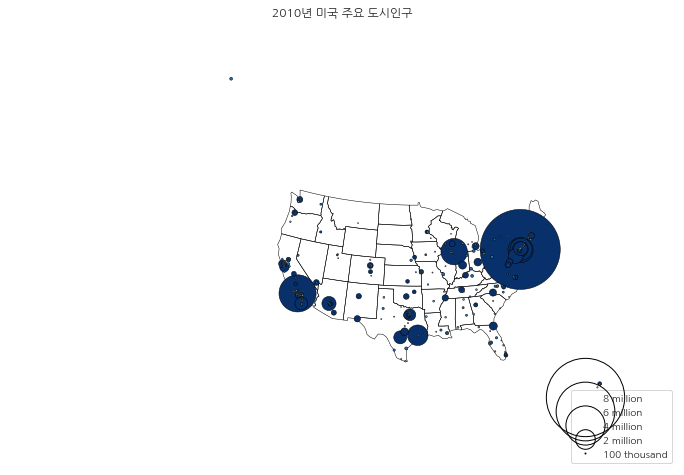

In [60]:
proj = gplt.crs.AlbersEqualArea()

base = gplt.polyplot(contiguous_usa, projection=proj, linewidth=0.5, figsize=(12, 12))

gplt.pointplot(continental_cities, scale='POP_2010', limits=(1, 80), hue='POP_2010', cmap='Blues', k=5, 
               linewidth=0.5, edgecolor='black', legend=True, legend_var='scale', 
               legend_values=[8000000, 6000000, 4000000, 2000000, 100000],
               legend_labels=['8 million', '6 million', '4 million',
                              '2 million', '100 thousand'],
               legend_kwargs={'loc': 'lower right'}, ax=base, projection=proj)
ax.set_ylim((-1597757, 1457718))
plt.title("2010년 미국 주요 도시인구")
plt.show()

#### 점 데이터가 무수히 많은 상황에서는 kdeplot()을 사용하여, 데이터의 밀도를 표현 할 수 있다. 

다음 코드는 뉴욕에서 발생한 충돌 사고를 시각화 한 것이다.

+ kedplot에 사용된 인자
    + shade : True 일 때, 데이터의 빈도를 진하기로 표현한다.
    + shade_lowest : False 일 때, 0에 가까운 빈도를 가진 구역에서는 진하기를 표현하지 않는다.
    + clip : 주어진 구역안에서만 시각화를 한다.

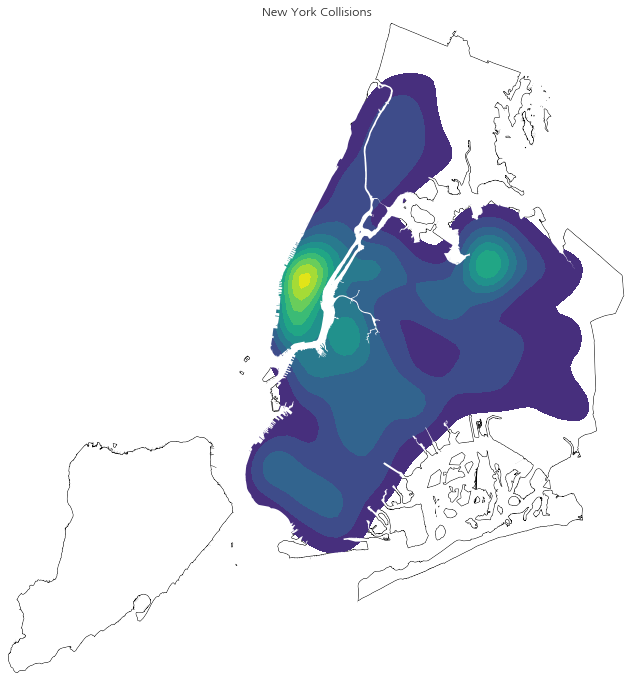

In [62]:
base = gplt.kdeplot(collisions, projection=proj, shade=True, shade_lowest=False, clip=boroughs.geometry, figsize=(12, 12))
base.set_title("New York Collisions")
gplt.polyplot(boroughs, projection=proj, ax=base)
plt.show()

### 거리 척도

기본적인 지리정보 분석이라 함은 지구 상의 두 대상에 대해 어떠한 관계를 알아내는 것이다. 
#### 이에 대해 Tobler's First Law of Geography 라는 것이 있는데, 가까이 있는 것은 멀리 있는 것보다 더 강한 관련성이 존재한다는 것이다. 

따라서 두 지점 간의 거리는 지리정보를 다룰 때 중요하게 고려해야 한다. 

#### 다음은 벡터간의 유사성에 대한 척도 중 지리정보를 처리하는데 잘 사용하는 거리 척도이다.

### 1. 유클리드 거리

#### 지리정보의 경우 유클리드 거리는 두 점을 잇는 가장 짧은 직선 거리이다. 

계산은 가장 간단하지만, 실제 거리와 잠재적인 차이가 제일 크다. 유클리드 거리를 수식으로 나타내면 다음과 같다.

$$Euclidean \ distance(x,y) = \sqrt{\displaystyle\sum_i^m | x_i - y_i|^2}$$

### 2. 맨하탄 거리 (Manhattan distance, City-block distance)

맨하탄 거리는 뉴욕의 택시가 출발지에서 도착지로 갈 때 빌딩을 피해 동, 서, 남, 북의 격자 모양의 도로를 직선으로 갈 때의 거리(즉, 가로 블록 + 세로 블록 절대합)를 본따서 이름을 붙힌 거리 척도이다. 맨하탄 거리를 수식으로 나타내면 다음과 같다.

$$Manhattan \ distance(x,y) = \displaystyle\sum_i^m | x_i - y_i|$$

### 3. 표준화 거리

표준화 거리는 각 변수를 해당변수의 표준편차로 표준화한 후, 유클리드 거리를 계산한 것이다. 스케일의 차이, 분산의 차이로 인한 왜곡을 피할 수 있다.표준화 거리는 다른 말로 통계적 거리 라고도 한다. 수식으로 나타내면 다음과 같다. 다음 수식에서  𝑆𝑖 은  𝑖 번째 변수의 표본분산을 의미한다.

$$Standardized \ distance(x,y) = \sqrt{\displaystyle\sum_i^m \left | \dfrac{x_i - y_i}{S_i} \right|^2}$$

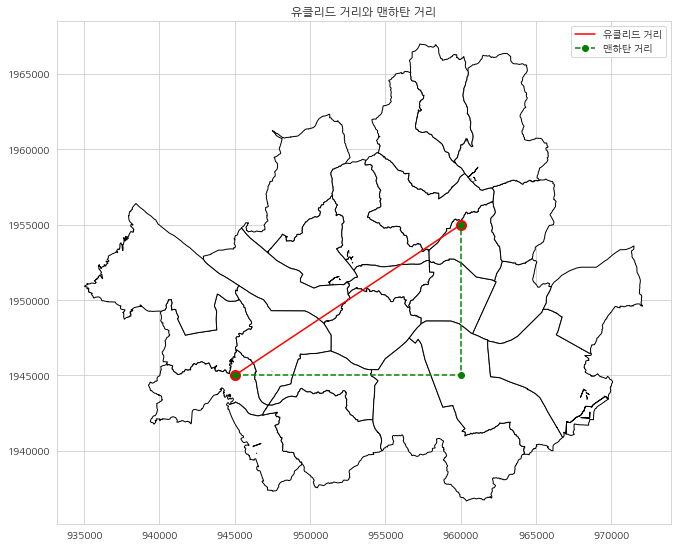

In [68]:
x = [945000, 960000]
y = [1945000, 1955000]

ax = seoul.plot(figsize=(11, 11), color='w', edgecolor='k')
ax.scatter(x, y, c='r', s=100)
ax.plot(x, y, c='r', label='유클리드 거리')
x.insert(1, 960000) # i번째에 960000집어 넣기
y.insert(1, 1945000)
ax.plot(x, y, 'go--', label='맨하탄 거리')
ax.legend()
plt.title("유클리드 거리와 맨하탄 거리")
plt.show()